# BOOKWORM

In [1]:
import numpy as np
import cv2
from PIL import Image

In [2]:
dot_kernel = np.ones((1,1),np.uint8)

circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

bigger_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
bigger_circle_kernel[0][1]=1
bigger_circle_kernel[0][3]=1
bigger_circle_kernel[4][1]=1
bigger_circle_kernel[4][3]=1


square_kernel = np.ones((3,3),np.uint8)

bigger_square_kernel = np.ones((5,5),np.uint8)

biggest_square_kernel= np.ones((7,7),np.uint8)

huge_kernel = np.ones((19,19), np.uint8)
huge_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19))

biggest_circle_kernel= np.ones((7,7),np.uint8)
biggest_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
biggest_circle_kernel[0][2]=1
biggest_circle_kernel[0][4]=1
biggest_circle_kernel[1][0]=1
biggest_circle_kernel[1][6]=1
biggest_circle_kernel[5][0]=1
biggest_circle_kernel[5][6]=1
biggest_circle_kernel[6][2]=1
biggest_circle_kernel[6][4]=1
#print(biggest_circle_kernel)

In [10]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

def arabic_processing(img,low_light):
    if low_light==True:
        rescaled = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
        grey = cv2.cvtColor(rescaled, cv2.COLOR_BGR2GRAY)
        high_brightness=apply_brightness_contrast(grey,100,50)
        thresholded = cv2.threshold(high_brightness, 160,255,cv2.THRESH_BINARY)[1]
        erosion = cv2.erode(thresholded, circle_kernel, iterations=4)
        dilated = cv2.dilate(erosion, bigger_circle_kernel, iterations=2)
        smoothed = cv2.GaussianBlur(dilated, (3,3), 0)
        cv2.imwrite('arabic-img-processed.png' , smoothed)
        im = Image.open("arabic-img-processed.png")
        im.save("arabic-img-processed.png", dpi=(300,300))
        return smoothed
    else:
        rescaled = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
        grey = cv2.cvtColor(rescaled, cv2.COLOR_BGR2GRAY)
        thresholded = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        erosion = cv2.erode(thresholded, circle_kernel, iterations=4)
        dilated = cv2.dilate(erosion, bigger_circle_kernel, iterations=2)
        smoothed = cv2.GaussianBlur(dilated, (3,3), 0)
        cv2.imwrite('arabic-img-processed.png' , smoothed)
        im = Image.open("arabic-img-processed.png")
        im.save("arabic-img-processed.png", dpi=(300,300))
        return smoothed

def english_processing(img,low_light):
    if low_light==True:
        rescaled = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
        grey = cv2.cvtColor(rescaled, cv2.COLOR_BGR2GRAY)
        high_brightness=apply_brightness_contrast(grey,100,50)
        thresholded = cv2.threshold(high_brightness, 160,255,cv2.THRESH_BINARY)[1]
        erosion = cv2.erode(thresholded, circle_kernel, iterations=5)
        dilated = cv2.dilate(erosion, circle_kernel, iterations=2)
        smoothed = cv2.GaussianBlur(dilated, (3,3), 0)
        cv2.imwrite('english-img-processed.png' , smoothed)
        im = Image.open("english-img-processed.png")
        im.save("english-img-processed.png", dpi=(300,300))
        return smoothed
    else:
        rescaled = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
        grey = cv2.cvtColor(rescaled, cv2.COLOR_BGR2GRAY)
        thresholded = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        erosion = cv2.erode(thresholded, circle_kernel, iterations=5)
        dilated = cv2.dilate(erosion, circle_kernel, iterations=2)
        smoothed = cv2.GaussianBlur(dilated, (3,3), 0)
        cv2.imwrite('english-img-processed.png' , smoothed)
        im = Image.open("english-img-processed.png")
        im.save("english-img-processed.png", dpi=(300,300))
        return smoothed

In [11]:
english01 = cv2.imread('inputs\english05.jpg',1)
arabic01 = cv2.imread('inputs\picrb.jpg',1)

arabic_processed=arabic_processing(arabic01,False)
english_processed=english_processing(english01,True)

# Rescaling

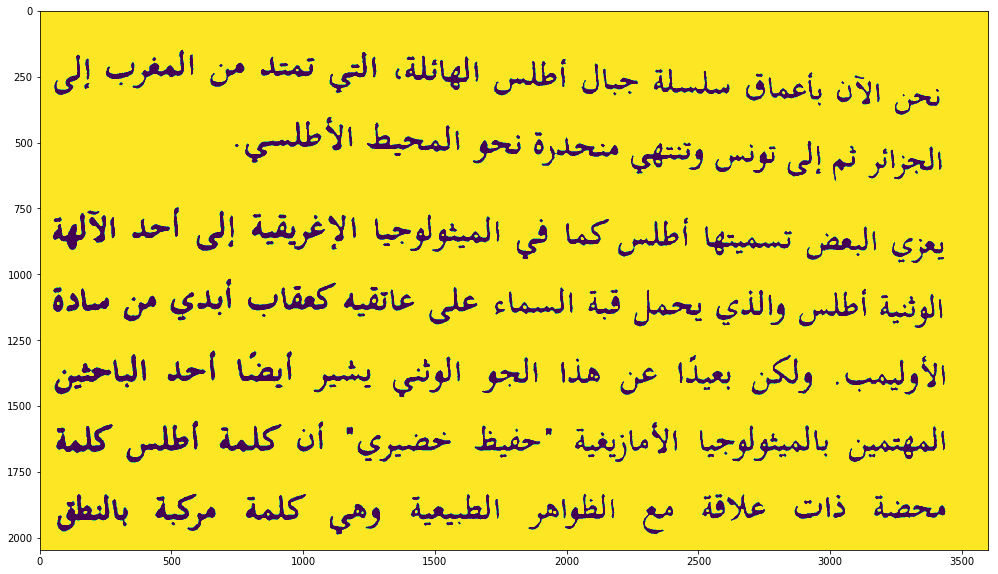

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
matplotlib.use('Agg')
%matplotlib inline
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.figsize'] = [17, 17]

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.imshow(arabic_processed)